Final centroids: 
[[ 4.88764248 -5.10313767]
 [-5.14307833 -5.11295063]
 [ 4.99904232  5.14277867]]
Cluster predictions for new data points: 
[0 2 1 0]


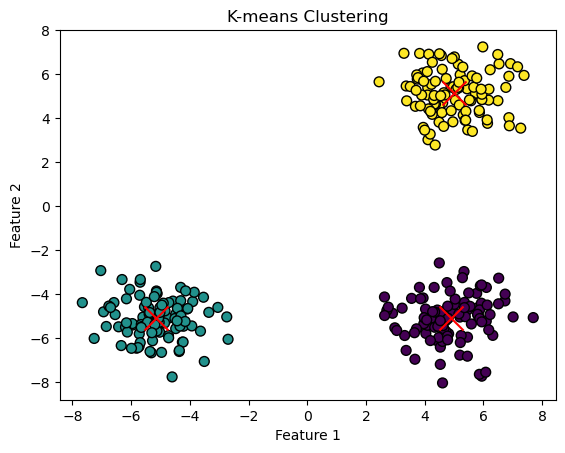

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(0)
        initial_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[initial_idx]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels_ = self._assign_clusters(X)
            # Calculate new centroids
            new_centroids = self._calculate_centroids(X)
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = X[self.labels_ == k].mean(axis=0)
        return centroids

    def _compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k, :], axis=1)
        return distances

    def predict(self, X):
        return self._assign_clusters(X)
# Generate some example data
np.random.seed(0)
X = np.vstack((np.random.randn(100, 2) + np.array([5, 5]),
               np.random.randn(100, 2) + np.array([-5, -5]),
               np.random.randn(100, 2) + np.array([5, -5])))

# Initialize and train the K-means clustering model
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4)
kmeans.fit(X)

# Print the final centroids
print(f"Final centroids: \n{kmeans.centroids}")

# Predict the cluster for new data points
new_data = np.array([[0, 0], [3, 3], [-3, -3], [6, -6]])
predictions = kmeans.predict(new_data)
print(f"Cluster predictions for new data points: \n{predictions}")

# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
